In [101]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split 
import keras 
from keras.models import Sequential 
from keras.layers import InputLayer 
from keras.layers import Dense 
from keras.layers import Dropout 
from keras.constraints import maxnorm

In [102]:
data = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [103]:
data.SeniorCitizen.replace([0, 1], ["No", "Yes"], inplace= True)
data.TotalCharges.replace([" "], ["0"], inplace= True)
data.TotalCharges = data.TotalCharges.astype(float)
data.drop("customerID", axis= 1, inplace= True) 
data.Churn.replace(["Yes", "No"], [1, 0], inplace= True)

In [104]:
data = pd.get_dummies(data)

In [105]:
X = data.drop("Churn", axis= 1)
y = data.Churn

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [107]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=20,
                              random_state=42)
rf.fit(X_train, y_train) 
score = rf.score(X_train, y_train)
score2 = rf.score(X_test, y_test)
print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.998
Test set accuracy:  0.790


In [108]:
rf_predictions = rf.predict(X_test)
rf_probs = rf.predict_proba(X_test)

In [109]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestRegressor
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[939  97]
 [199 174]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.86      1036
           1       0.64      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409

0.7899219304471257


In [110]:
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': rf.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi.head()

,feature,importance
2,TotalCharges,0.156715
0,tenure,0.139134
1,MonthlyCharges,0.137528
37,Contract_Month-to-month,0.050045
19,OnlineSecurity_No,0.033819


In [111]:
model = Sequential()
model.add(Dense(64, input_dim=46, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(rate=0.2))
model.add(Dense(8, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(rate=0.2))
model.add(Dense(1, activation='sigmoid'))

In [112]:
model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics=['accuracy'])

In [113]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=8)

Train on 5634 samples, validate on 1409 samples
Epoch 1/50
5634/5634 [==============================] - 3s 557us/step - loss: 24.6655 - accuracy: 0.6897 - val_loss: 0.5567 - val_accuracy: 0.7353
Epoch 2/50
5634/5634 [==============================] - 3s 492us/step - loss: 0.6679 - accuracy: 0.7322 - val_loss: 0.5620 - val_accuracy: 0.7353
Epoch 3/50
5634/5634 [==============================] - 3s 498us/step - loss: 0.6382 - accuracy: 0.7322 - val_loss: 0.5582 - val_accuracy: 0.7353
Epoch 4/50
5634/5634 [==============================] - 3s 491us/step - loss: 0.5800 - accuracy: 0.7345 - val_loss: 0.5680 - val_accuracy: 0.7353
Epoch 5/50
5634/5634 [==============================] - 3s 487us/step - loss: 0.5977 - accuracy: 0.7336 - val_loss: 0.5658 - val_accuracy: 0.7353
Epoch 6/50
5634/5634 [==============================] - 3s 496us/step - loss: 0.5827 - accuracy: 0.7330 - val_loss: 0.5623 - val_accuracy: 0.7353
Epoch 7/50
5634/5634 [==============================] - 3s 491us/step - los

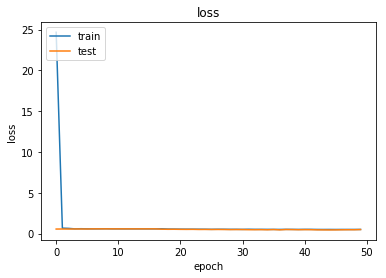

In [114]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('loss') 
plt.ylabel('loss')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

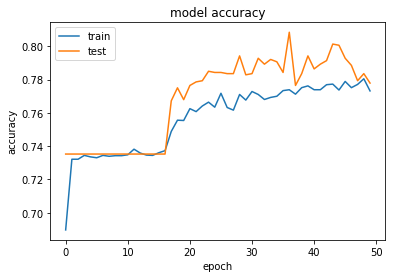

In [115]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show()